# Classification In Tensorflow

## Dataset used is Breast Cancer wisconsin

In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [43]:
df = pd.read_csv("D:/Python DataScience/breast_cancer_data.csv")

In [44]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [47]:
# Dropping not so important columns
df.drop(['id'],axis=1,inplace=True)
df.drop(df.columns[-1],inplace=True,axis=1)

In [48]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    fl

In [51]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [62]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [63]:
# classifying M = 0  AND  B = 1
# Diagnosis (M = malignant, B = benign)
df['diagnosis']=df['diagnosis'].apply(lambda x : 0 if x=='M' else 1)

In [64]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


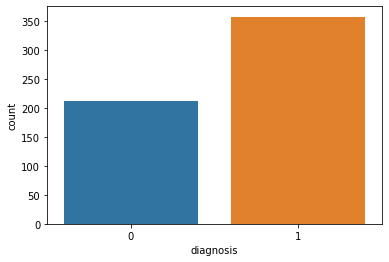

In [65]:
sns.countplot(x="diagnosis",data=df)

In [68]:
df.shape

(569, 30)

In [70]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.627417,0.483918,0.000000,0.000000,1.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [77]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,...,-0.077972,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826


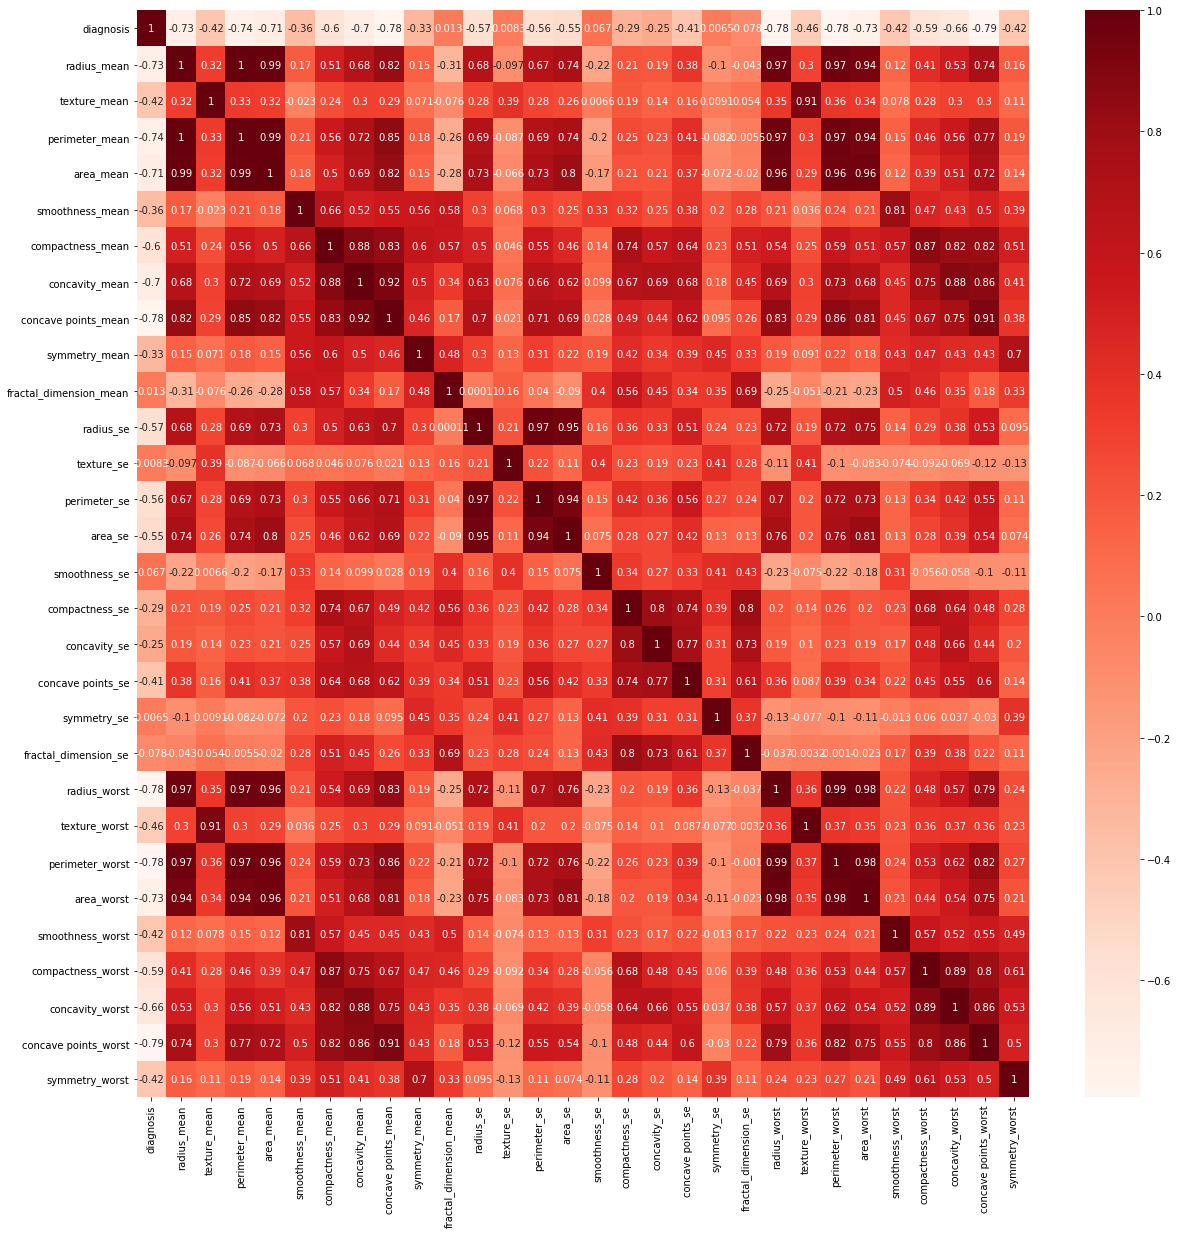

In [76]:
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

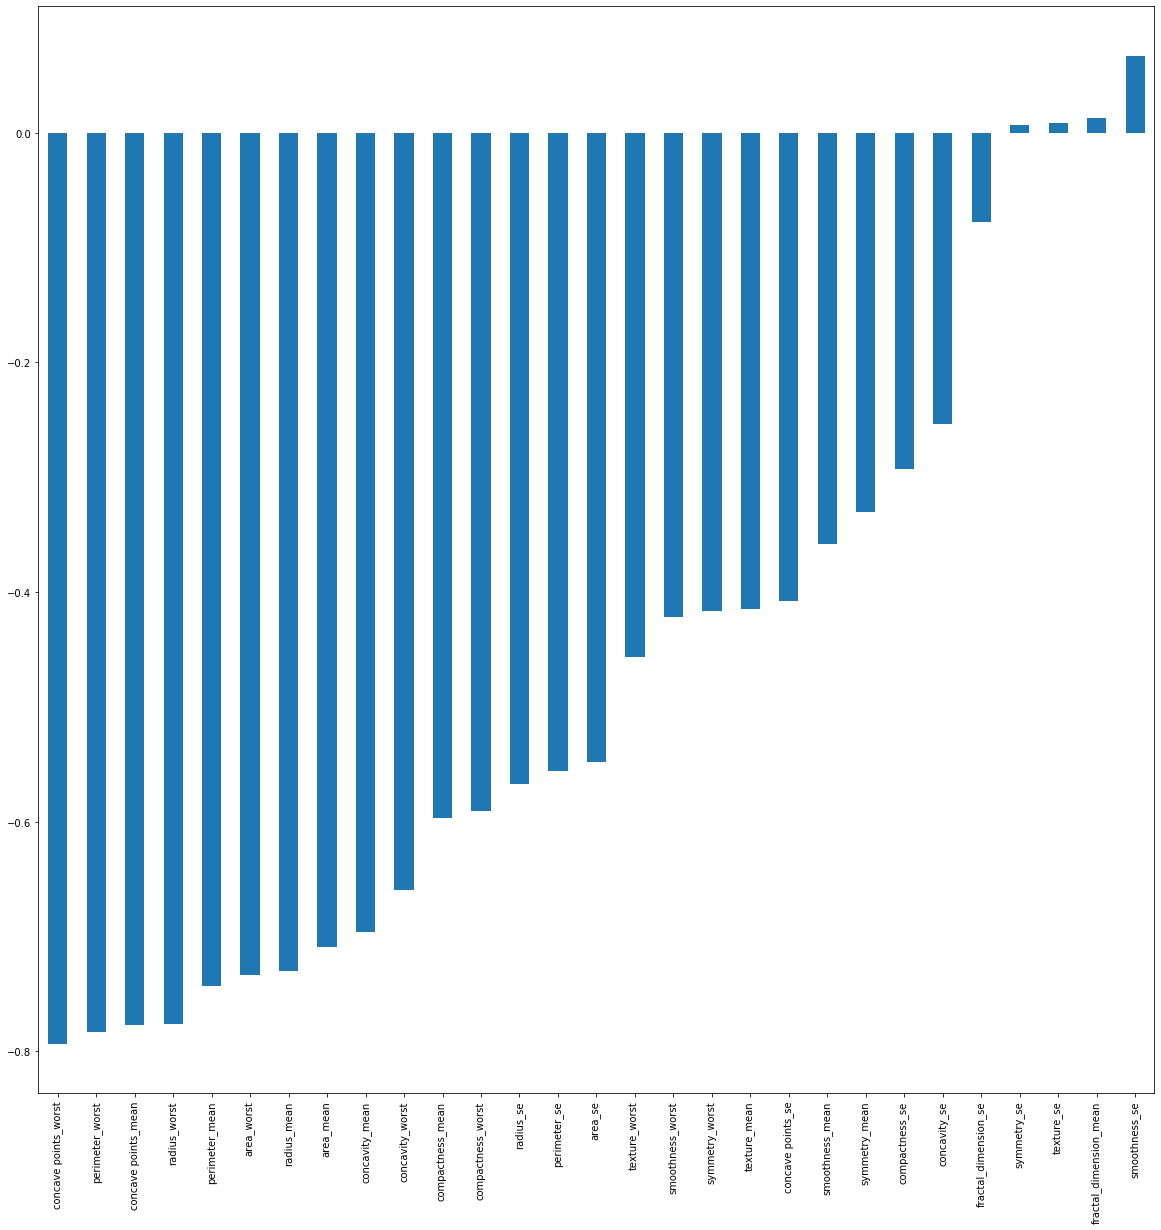

In [92]:
# Lets find out how is diagnosis correlated with other attributes
# Find out the highest correlation attributes
plt.figure(figsize=(20,20))
df.corr()['diagnosis'].sort_values()[:-1].plot(kind='bar')

In [95]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [103]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout


In [105]:
X_train.shape

(426, 29)

In [106]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')


In [107]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data =(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 10s 23ms/sample - loss: 0.6872 - val_loss: 0.6545
Epoch 2/600
426/426 [==============================] - 0s 529us/sample - loss: 0.6505 - val_loss: 0.6186
Epoch 3/600
426/426 [==============================] - 0s 278us/sample - loss: 0.6144 - val_loss: 0.5798
Epoch 4/600
426/426 [==============================] - 0s 280us/sample - loss: 0.5705 - val_loss: 0.5252
Epoch 5/600
426/426 [==============================] - 0s 282us/sample - loss: 0.5178 - val_loss: 0.4686
Epoch 6/600
426/426 [==============================] - 0s 282us/sample - loss: 0.4653 - val_loss: 0.4113
Epoch 7/600
426/426 [==============================] - 0s 332us/sample - loss: 0.4148 - val_loss: 0.3576
Epoch 8/600
426/426 [==============================] - 0s 506us/sample - loss: 0.3669 - val_loss: 0.3105
Epoch 9/600
426/426 [==============================] - 0s 328us/sample - loss: 0.3284 - val_loss: 0.2735
Epoch 10/

Epoch 78/600
426/426 [==============================] - 0s 289us/sample - loss: 0.0490 - val_loss: 0.0903
Epoch 79/600
426/426 [==============================] - 0s 283us/sample - loss: 0.0490 - val_loss: 0.0912
Epoch 80/600
426/426 [==============================] - 0s 228us/sample - loss: 0.0506 - val_loss: 0.0886
Epoch 81/600
426/426 [==============================] - 0s 223us/sample - loss: 0.0562 - val_loss: 0.0952
Epoch 82/600
426/426 [==============================] - 0s 210us/sample - loss: 0.0534 - val_loss: 0.0874
Epoch 83/600
426/426 [==============================] - 0s 244us/sample - loss: 0.0500 - val_loss: 0.0901
Epoch 84/600
426/426 [==============================] - 0s 224us/sample - loss: 0.0554 - val_loss: 0.0918
Epoch 85/600
426/426 [==============================] - 0s 334us/sample - loss: 0.0496 - val_loss: 0.0865
Epoch 86/600
426/426 [==============================] - 0s 266us/sample - loss: 0.0491 - val_loss: 0.0894
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 280us/sample - loss: 0.0414 - val_loss: 0.1053
Epoch 156/600
426/426 [==============================] - 0s 330us/sample - loss: 0.0380 - val_loss: 0.1028
Epoch 157/600
426/426 [==============================] - 0s 291us/sample - loss: 0.0373 - val_loss: 0.1028
Epoch 158/600
426/426 [==============================] - 0s 275us/sample - loss: 0.0366 - val_loss: 0.1009
Epoch 159/600
426/426 [==============================] - 0s 266us/sample - loss: 0.0380 - val_loss: 0.1016
Epoch 160/600
426/426 [==============================] - 0s 202us/sample - loss: 0.0365 - val_loss: 0.1010
Epoch 161/600
426/426 [==============================] - 0s 207us/sample - loss: 0.0369 - val_loss: 0.1008
Epoch 162/600
426/426 [==============================] - 0s 202us/sample - loss: 0.0367 - val_loss: 0.1067
Epoch 163/600
426/426 [==============================] - 0s 216us/sample - loss: 0.0382 - val_loss: 0.1020
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 199us/sample - loss: 0.0306 - val_loss: 0.1021
Epoch 232/600
426/426 [==============================] - 0s 166us/sample - loss: 0.0328 - val_loss: 0.1049
Epoch 233/600
426/426 [==============================] - 0s 191us/sample - loss: 0.0326 - val_loss: 0.0994
Epoch 234/600
426/426 [==============================] - 0s 233us/sample - loss: 0.0294 - val_loss: 0.1011
Epoch 235/600
426/426 [==============================] - 0s 271us/sample - loss: 0.0287 - val_loss: 0.0995
Epoch 236/600
426/426 [==============================] - 0s 253us/sample - loss: 0.0311 - val_loss: 0.0988
Epoch 237/600
426/426 [==============================] - 0s 201us/sample - loss: 0.0288 - val_loss: 0.0979
Epoch 238/600
426/426 [==============================] - 0s 181us/sample - loss: 0.0288 - val_loss: 0.0983
Epoch 239/600
426/426 [==============================] - 0s 176us/sample - loss: 0.0334 - val_loss: 0.1047
Epoch 240/600
426/426 [============================

426/426 [==============================] - 0s 330us/sample - loss: 0.0230 - val_loss: 0.0970
Epoch 308/600
426/426 [==============================] - 0s 249us/sample - loss: 0.0236 - val_loss: 0.0970
Epoch 309/600
426/426 [==============================] - 0s 292us/sample - loss: 0.0251 - val_loss: 0.1015
Epoch 310/600
426/426 [==============================] - 0s 240us/sample - loss: 0.0255 - val_loss: 0.0980
Epoch 311/600
426/426 [==============================] - 0s 234us/sample - loss: 0.0240 - val_loss: 0.1015
Epoch 312/600
426/426 [==============================] - 0s 220us/sample - loss: 0.0288 - val_loss: 0.0995
Epoch 313/600
426/426 [==============================] - 0s 221us/sample - loss: 0.0245 - val_loss: 0.0993
Epoch 314/600
426/426 [==============================] - 0s 223us/sample - loss: 0.0251 - val_loss: 0.0965
Epoch 315/600
426/426 [==============================] - 0s 244us/sample - loss: 0.0240 - val_loss: 0.0998
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 240us/sample - loss: 0.0265 - val_loss: 0.1186
Epoch 384/600
426/426 [==============================] - 0s 173us/sample - loss: 0.0284 - val_loss: 0.1098
Epoch 385/600
426/426 [==============================] - 0s 258us/sample - loss: 0.0189 - val_loss: 0.1127
Epoch 386/600
426/426 [==============================] - 0s 275us/sample - loss: 0.0289 - val_loss: 0.1018
Epoch 387/600
426/426 [==============================] - 0s 270us/sample - loss: 0.0238 - val_loss: 0.1026
Epoch 388/600
426/426 [==============================] - 0s 271us/sample - loss: 0.0247 - val_loss: 0.1089
Epoch 389/600
426/426 [==============================] - 0s 172us/sample - loss: 0.0404 - val_loss: 0.1240
Epoch 390/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0258 - val_loss: 0.1368
Epoch 391/600
426/426 [==============================] - 0s 170us/sample - loss: 0.0365 - val_loss: 0.1003
Epoch 392/600
426/426 [============================

426/426 [==============================] - 0s 175us/sample - loss: 0.0138 - val_loss: 0.1065
Epoch 460/600
426/426 [==============================] - 0s 206us/sample - loss: 0.0153 - val_loss: 0.1064
Epoch 461/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0139 - val_loss: 0.1073
Epoch 462/600
426/426 [==============================] - 0s 193us/sample - loss: 0.0156 - val_loss: 0.1058
Epoch 463/600
426/426 [==============================] - 0s 194us/sample - loss: 0.0161 - val_loss: 0.1114
Epoch 464/600
426/426 [==============================] - 0s 183us/sample - loss: 0.0153 - val_loss: 0.1191
Epoch 465/600
426/426 [==============================] - 0s 221us/sample - loss: 0.0157 - val_loss: 0.1156
Epoch 466/600
426/426 [==============================] - 0s 281us/sample - loss: 0.0152 - val_loss: 0.1124
Epoch 467/600
426/426 [==============================] - 0s 349us/sample - loss: 0.0148 - val_loss: 0.1114
Epoch 468/600
426/426 [============================

426/426 [==============================] - 0s 223us/sample - loss: 0.0114 - val_loss: 0.1167
Epoch 536/600
426/426 [==============================] - 0s 206us/sample - loss: 0.0110 - val_loss: 0.1164
Epoch 537/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0109 - val_loss: 0.1212
Epoch 538/600
426/426 [==============================] - 0s 264us/sample - loss: 0.0136 - val_loss: 0.1145
Epoch 539/600
426/426 [==============================] - 0s 285us/sample - loss: 0.0103 - val_loss: 0.1181
Epoch 540/600
426/426 [==============================] - 0s 308us/sample - loss: 0.0106 - val_loss: 0.1188
Epoch 541/600
426/426 [==============================] - 0s 249us/sample - loss: 0.0110 - val_loss: 0.1210
Epoch 542/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0124 - val_loss: 0.1159
Epoch 543/600
426/426 [==============================] - 0s 203us/sample - loss: 0.0106 - val_loss: 0.1256
Epoch 544/600
426/426 [============================

## Let us check training loss vs validation loss

In [108]:
losses = pd.DataFrame(model.history.history)

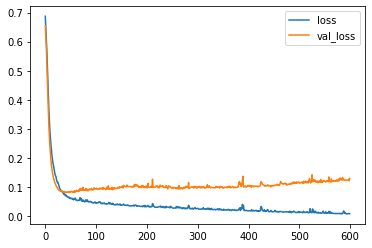

In [113]:
losses.plot()

Case of overfitting as validation loss is increasing after certain epochs of training.

# Re-Training of model with concept of callbacks 

In [114]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [115]:
from tensorflow.keras.callbacks import EarlyStopping

In [116]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [117]:
# For validation loss we can monitor it by stopping it when min val loss is obtained 
# Verbose (Type of visualization)
# Patience - number of epochs more after reaching min to handle noise
# mode - min (suitable measure for you monitoring quantity)
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)


In [118]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data =(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6771 - val_loss: 0.6498
Epoch 2/600
426/426 [==============================] - 0s 225us/sample - loss: 0.6395 - val_loss: 0.6118
Epoch 3/600
426/426 [==============================] - 0s 234us/sample - loss: 0.6036 - val_loss: 0.5739
Epoch 4/600
426/426 [==============================] - 0s 236us/sample - loss: 0.5628 - val_loss: 0.5254
Epoch 5/600
426/426 [==============================] - 0s 233us/sample - loss: 0.5142 - val_loss: 0.4689
Epoch 6/600
426/426 [==============================] - 0s 231us/sample - loss: 0.4634 - val_loss: 0.4142
Epoch 7/600
426/426 [==============================] - 0s 236us/sample - loss: 0.4143 - val_loss: 0.3597
Epoch 8/600
426/426 [==============================] - 0s 221us/sample - loss: 0.3633 - val_loss: 0.3098
Epoch 9/600
426/426 [==============================] - 0s 227us/sample - loss: 0.3227 - val_loss: 0.2667
Epoch 10/60

## Stopped at 70 epochs

In [119]:
losses = pd.DataFrame(model.history.history)

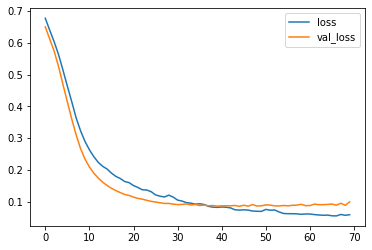

In [120]:
losses.plot()

Observation - We have stopped as soon as our loss has started increasing

# Concept of Dropout to Reduce Overfitting

In [139]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')


In [140]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data =(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7001 - val_loss: 0.6748
Epoch 2/600
426/426 [==============================] - 0s 245us/sample - loss: 0.6837 - val_loss: 0.6604
Epoch 3/600
426/426 [==============================] - 0s 228us/sample - loss: 0.6616 - val_loss: 0.6476
Epoch 4/600
426/426 [==============================] - 0s 210us/sample - loss: 0.6636 - val_loss: 0.6304
Epoch 5/600
426/426 [==============================] - 0s 266us/sample - loss: 0.6423 - val_loss: 0.6136
Epoch 6/600
426/426 [==============================] - 0s 348us/sample - loss: 0.6234 - val_loss: 0.5956
Epoch 7/600
426/426 [==============================] - 0s 261us/sample - loss: 0.5987 - val_loss: 0.5679
Epoch 8/600
426/426 [==============================] - 0s 198us/sample - loss: 0.5769 - val_loss: 0.5362
Epoch 9/600
426/426 [==============================] - 0s 233us/sample - loss: 0.5257 - val_loss: 0.5027
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 252us/sample - loss: 0.1396 - val_loss: 0.0775
Epoch 79/600
426/426 [==============================] - 0s 317us/sample - loss: 0.1359 - val_loss: 0.0815
Epoch 80/600
426/426 [==============================] - 0s 347us/sample - loss: 0.1299 - val_loss: 0.0744
Epoch 81/600
426/426 [==============================] - 0s 276us/sample - loss: 0.1320 - val_loss: 0.0794
Epoch 82/600
426/426 [==============================] - 0s 224us/sample - loss: 0.1232 - val_loss: 0.0742
Epoch 83/600
426/426 [==============================] - 0s 211us/sample - loss: 0.1061 - val_loss: 0.0857
Epoch 84/600
426/426 [==============================] - 0s 242us/sample - loss: 0.1118 - val_loss: 0.0686
Epoch 85/600
426/426 [==============================] - 0s 233us/sample - loss: 0.1107 - val_loss: 0.0833
Epoch 86/600
426/426 [==============================] - 0s 232us/sample - loss: 0.1213 - val_loss: 0.0800
Epoch 87/600
426/426 [========================

## Stopped at 127 epochs

In [141]:
losses = pd.DataFrame(model.history.history)

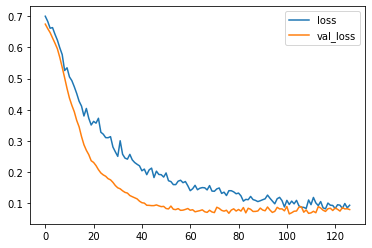

In [142]:
losses.plot()

In [150]:
predictions = model.predict_classes(X_test)

In [151]:
from sklearn.metrics import classification_report,confusion_matrix

In [152]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        56
           1       0.95      1.00      0.97        87

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [153]:
print(confusion_matrix(y_test,predictions))

[[51  5]
 [ 0 87]]
